In [30]:
from pathlib import Path
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
data_path = Path('data').resolve()
X_path= data_path / 'EX.npy'
y_path = data_path / 'EY.npy'


In [32]:
X, Y =  np.load(X_path), np.load(y_path)
X.shape, Y.shape


((177420, 64, 13), (177420,))

In [33]:
# cut 
CUT = 0.15 # higher less is cut

In [34]:
Y = Y / max(abs(Y.min()), abs(Y.max())) 

(array([1.0000e+00, 0.0000e+00, 2.0000e+00, 4.0000e+00, 7.0000e+00,
        6.0000e+00, 4.0000e+00, 8.0000e+00, 1.3000e+01, 1.5000e+01,
        2.6000e+01, 1.7000e+01, 2.7000e+01, 3.6000e+01, 2.8000e+01,
        3.8000e+01, 4.8000e+01, 2.5000e+01, 2.3000e+01, 2.2000e+01,
        1.3000e+01, 1.3000e+01, 1.9000e+01, 2.5000e+01, 3.2000e+01,
        3.6000e+01, 4.9000e+01, 5.3000e+01, 8.2000e+01, 9.6000e+01,
        1.7200e+02, 2.1500e+02, 2.8800e+02, 4.3100e+02, 5.0100e+02,
        7.3200e+02, 9.4300e+02, 1.2190e+03, 1.6300e+03, 1.9690e+03,
        2.3740e+03, 2.9380e+03, 3.5120e+03, 4.2010e+03, 5.9550e+03,
        7.9890e+03, 9.1220e+03, 7.1790e+03, 5.4870e+03, 5.5980e+03,
        8.5000e+03, 2.1598e+04, 1.0408e+04, 6.3730e+03, 6.1300e+03,
        8.0900e+03, 9.7570e+03, 9.6640e+03, 7.4670e+03, 5.4730e+03,
        4.3210e+03, 3.4110e+03, 2.8670e+03, 2.2110e+03, 1.8410e+03,
        1.3780e+03, 1.0810e+03, 8.2800e+02, 5.7700e+02, 4.5300e+02,
        3.6000e+02, 2.5500e+02, 1.9700e+02, 1.54

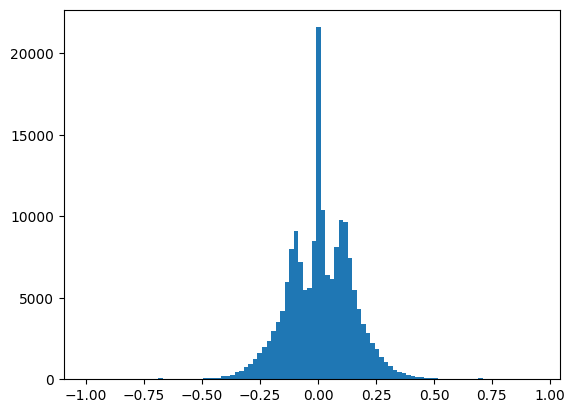

In [35]:
# plot y distribution

plt.hist(Y, bins=100)

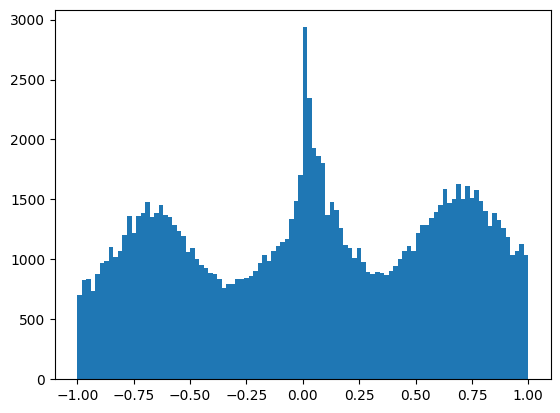

((120229, 64, 13), (120229,))

In [36]:
error = .05
X = list(X)
Y = list(Y)
new_x = []
new_y = []
for i in range(len(Y)):
    if not (abs(Y[i]) < error and np.random.random() < -.5 + (error - abs(Y[i])) / error) and not (abs(Y[i]) >CUT):
        new_x.append(X[i])
        new_y.append(Y[i])
X = np.array(new_x).reshape(-1, 64, 13)
Y = np.array(new_y)
Y = Y / max(abs(Y.min()), abs(Y.max()))
plt.hist(Y, bins=100)
plt.show()
X.shape, Y.shape

In [37]:


# split the data into train and test se
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.01, random_state=42)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((119026, 64, 13), (1203, 64, 13), (119026,), (1203,))

Epoch 1/50
117/117 [==============================] - 3s 16ms/step - loss: 0.4355 - mse: 0.2739 - val_loss: 0.3192 - val_mse: 0.1554
Epoch 2/50
117/117 [==============================] - 1s 13ms/step - loss: 0.2622 - mse: 0.1189 - val_loss: 0.1833 - val_mse: 0.0596
Epoch 3/50
117/117 [==============================] - 2s 13ms/step - loss: 0.1982 - mse: 0.0734 - val_loss: 0.1586 - val_mse: 0.0488
Epoch 4/50
117/117 [==============================] - 2s 13ms/step - loss: 0.1764 - mse: 0.0591 - val_loss: 0.1472 - val_mse: 0.0432
Epoch 5/50
117/117 [==============================] - 1s 13ms/step - loss: 0.1624 - mse: 0.0507 - val_loss: 0.1384 - val_mse: 0.0399
Epoch 6/50
117/117 [==============================] - 1s 13ms/step - loss: 0.1537 - mse: 0.0459 - val_loss: 0.1325 - val_mse: 0.0370
Epoch 7/50
117/117 [==============================] - 2s 13ms/step - loss: 0.1474 - mse: 0.0428 - val_loss: 0.1317 - val_mse: 0.0369
Epoch 8/50
117/117 [==============================] - 2s 13ms/step - 

<AxesSubplot: >

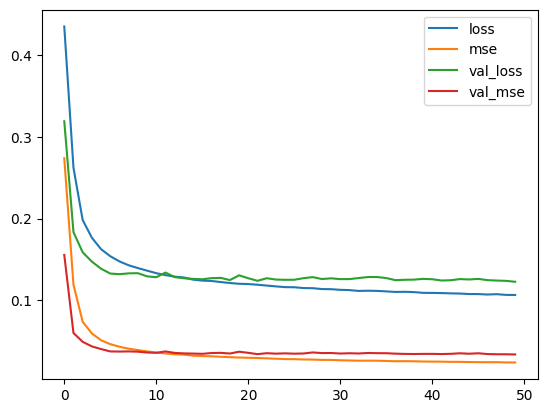

In [48]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 13)),
    # flatten data
    # tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(24, activation='softmax'),
    tf.keras.layers.Dense(1),
])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
model.compile(optimizer='adam', loss='mae', metrics=['mse'])

history = model.fit(X_train, Y_train, epochs=50, validation_data=(X_test, Y_test), batch_size=1024)

pd.DataFrame(history.history).plot()


38/38 [==============================] - 0s 2ms/step


(array([ 8.,  7., 15.,  8.,  9., 14., 10., 11.,  9., 13., 11., 14.,  9.,
        22., 14., 16., 12., 12., 16.,  8., 12., 16.,  9., 11., 12., 12.,
        12., 11., 10.,  5.,  8.,  8., 10.,  2., 13., 15., 14.,  5.,  3.,
         7.,  7.,  7.,  9., 11., 11., 14., 12., 11., 14., 17., 21., 19.,
        25., 13., 16.,  8., 24., 10., 14., 10., 10., 12.,  8., 10.,  7.,
         9., 10., 10., 11.,  9.,  7., 12.,  9., 16.,  7., 13., 15.,  8.,
         9., 19., 18., 18., 11., 11., 17., 18., 19., 22., 20., 15., 15.,
         8., 13.,  9., 18., 11., 10.,  5., 11., 17.]),
 array([-1.  , -0.98, -0.96, -0.94, -0.92, -0.9 , -0.88, -0.86, -0.84,
        -0.82, -0.8 , -0.78, -0.76, -0.74, -0.72, -0.7 , -0.68, -0.66,
        -0.64, -0.62, -0.6 , -0.58, -0.56, -0.54, -0.52, -0.5 , -0.48,
        -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34, -0.32, -0.3 ,
        -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16, -0.14, -0.12,
        -0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,
        

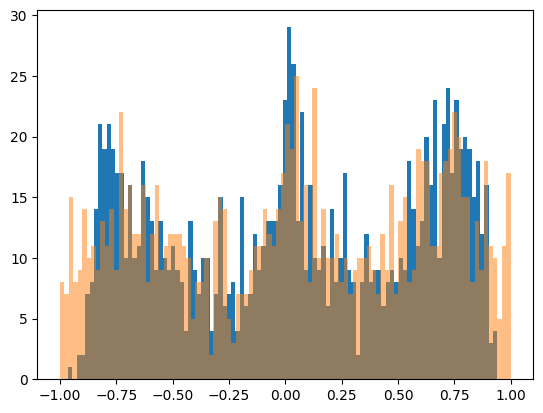

In [49]:
Y_pred = model.predict(X_test)
plt.hist(Y_pred, bins=100, alpha=1)
plt.hist(Y_test, bins=100, alpha=.5)


In [40]:
# show 10 random predictions
multipler = (max(Y)*CUT)*max(np.load(y_path))/100
for i in range(10):
    i = np.random.randint(len(Y_test))
    print(f"prediction: {Y_pred[i][0]*multipler:.2f}, actual: {Y_test[i]*multipler:.2f}")
print(f'mean error: {np.mean(np.abs(Y_pred - Y_test)):.3f}')
max_error = .1

# count positions where the prediction is within max_error of the actual value
correct = 0

for i in range(len(Y_test)):

    if abs(Y_pred[i][0] - Y_test[i]) < max_error:
        correct += 1
print(f"accuracy: {correct / len(Y_test):.2f}")



prediction: -0.10, actual: 0.09
prediction: 5.20, actual: 3.49
prediction: 7.84, actual: 8.65
prediction: -8.16, actual: -8.46
prediction: -0.10, actual: 0.09
prediction: 4.01, actual: 4.69
prediction: 6.07, actual: 5.85
prediction: -10.24, actual: -10.68
prediction: 4.40, actual: 3.03
prediction: -5.86, actual: -6.77
mean error: 0.645
accuracy: 0.54


In [50]:
print((max(Y)*CUT)*max(np.load(y_path)))

1262.3999999999999


In [51]:
# save the model
model.save('model.h5')
